## Part 1 - Organize the Audio Data

In [1]:
import utils as u
import librosa
import soundfile as sf
import os
import numpy as np

In [2]:
# No need to convert again in the future, just use the files in wav_files folder directly
data_home = '/Volumes/T7/group5_DL4M/data/dev_set'
# u.convert_flac_to_wav_librosa(data_home)

In [3]:
wav_directory = '/Volumes/T7/group5_DL4M/dev_set/wav_files'
label_file = '/Users/mona/Documents/GitHub/group_5_DL4M1/data/dev.txt'

In [4]:
audio_data, audio_labels = u.load_data(wav_directory, label_file)

In [5]:
# Example of using loaded data
print("Loaded", len(audio_data), "audio files.")
print("Sample labels:", audio_labels[:10]) # Print the first 10 labels

Loaded 41728 audio files.
Sample labels: ['bonafide', 'deepfake', 'deepfake', 'deepfake', 'deepfake', 'deepfake', 'deepfake', 'bonafide', 'deepfake', 'deepfake']


Look at one sample from the dataset

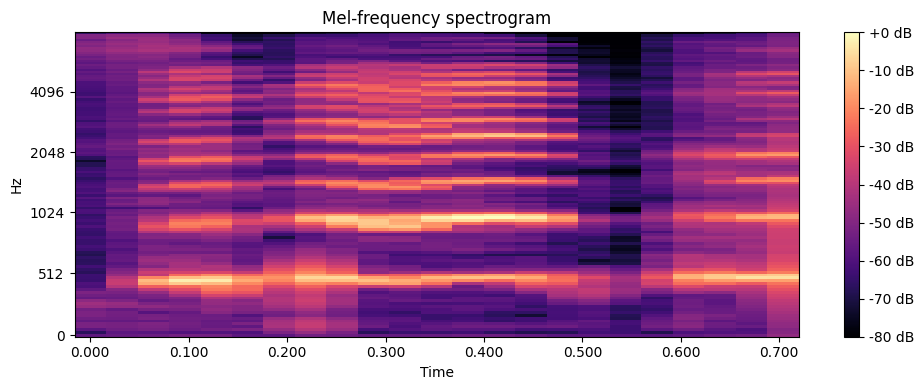

sr= 16000


In [6]:
import librosa.display
import matplotlib.pyplot as plt
from IPython.display import Audio
import numpy as np

# Load an audio file
file_path = '/Volumes/T7/group5_DL4M/dev_set/wav_files/CtrSVDD_0059_D_0000530.wav'
audio, sr = librosa.load(file_path, sr=None)  # Load with the original sample rate

# Play the audio
display(Audio(data=audio, rate=sr))

# Plot the spectrogram. refer: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.colorbar.html
plt.figure(figsize=(10, 4))
S = librosa.feature.melspectrogram(y=audio, sr=sr)
S_dB = librosa.power_to_db(S, ref=np.max)
librosa.display.specshow(S_dB, x_axis='time', y_axis='mel', sr=sr, fmax=8000)
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-frequency spectrogram')
plt.tight_layout()
plt.show()

print("sr=", sr)

Define Splite

In [7]:
train_data, val_data, test_data, train_labels, val_labels, test_labels = u.split_data(
    audio_data, audio_labels, test_size=0.2, val_size=0.2)

print("Training data size:", len(train_data))
print("Validation data size:", len(val_data))
print("Test data size:", len(test_data))

Training data size: 25036
Validation data size: 8346
Test data size: 8346


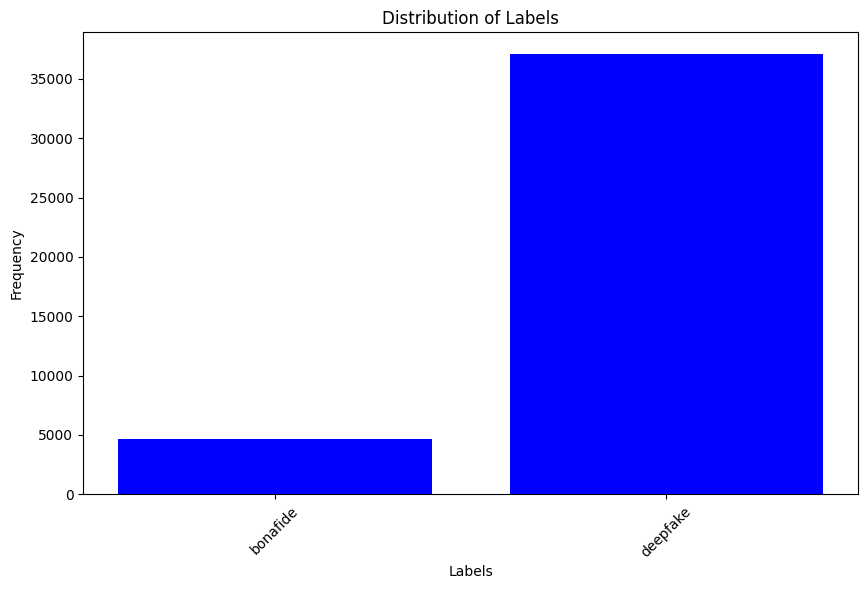

In [8]:
u.plot_label_distribution(audio_labels)

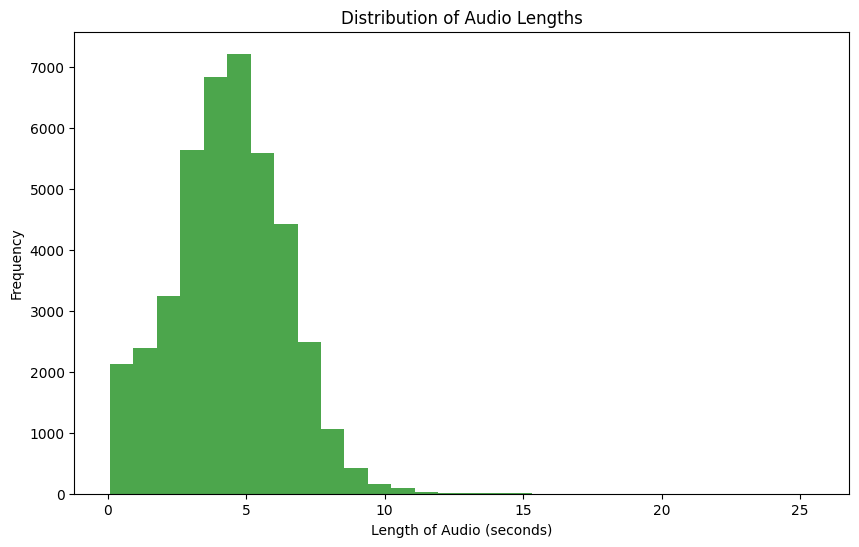

In [9]:
u.plot_audio_length_distribution(audio_data, sr)

### Data Preprocessing

MFCC & LFCC 

In [10]:
# Look at the lfcc of one audio file
audio, sr = librosa.load('/Volumes/T7/group5_DL4M/dev_set/wav_files/CtrSVDD_0110_D_0012049.wav', sr=None)  # Load an audio file
mfccs = u.compute_mfcc(audio, sr)
print("MFCCs:", mfccs.shape)

MFCCs: (13, 126)


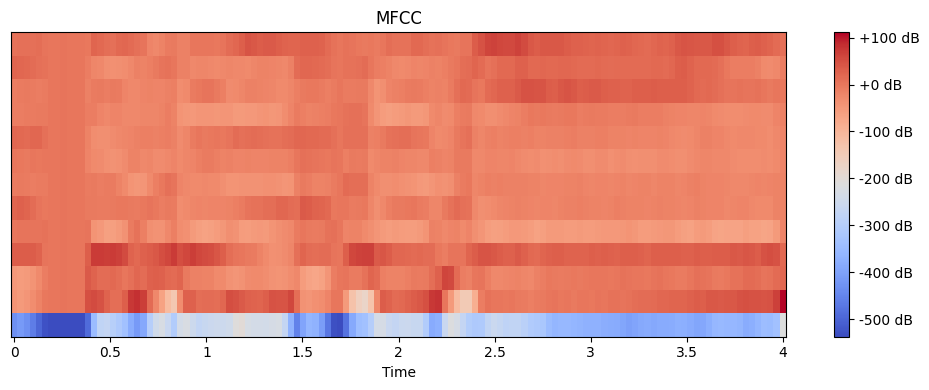

In [11]:
u.plot_mfcc(mfccs, sr)

In [12]:
lfccs = u.compute_lfcc(audio, sr)
print("LFCCs:", lfccs.shape)

LFCCs: (13, 126)


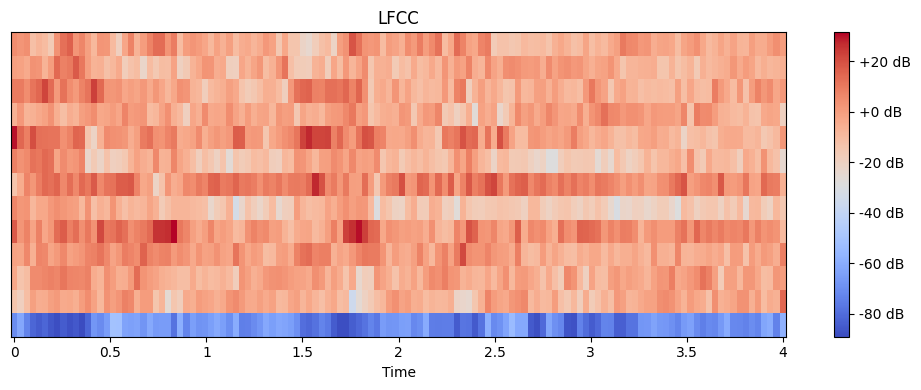

In [13]:
u.plot_lfcc(lfccs, sr)

Prepare Data for Modeling

In [14]:
# Batch Processing for Feature Extraction
# Testing on 2 files to see results
test_file_paths = ['/Volumes/T7/group5_DL4M/dev_set/wav_files/CtrSVDD_0059_D_0000525.wav',
                   '/Volumes/T7/group5_DL4M/dev_set/wav_files/CtrSVDD_0059_D_0000526.wav']  
test_features, test_sr = u.load_and_extract_features(test_file_paths, feature_type='lfcc')

print("Shape of extracted features:", test_features.shape)
print("Sample rate used:", test_sr)

Shape of extracted features: (26, 54)
Sample rate used: 16000


In [15]:
# Test storing features in h5 file
import h5py

# Create an HDF5 file
with h5py.File('/Users/mona/Documents/GitHub/group_5_DL4M1/data/test_LFCC_features.h5', 'w') as h5f:
    h5f.create_dataset('LFCC_dataset_test', data=np.array(test_features))

In [16]:
test_features, test_sr = u.load_and_extract_features(test_file_paths, feature_type='mfcc')

print("Shape of extracted features:", test_features.shape)
print("Sample rate used:", test_sr)

Shape of extracted features: (26, 54)
Sample rate used: 16000


In [17]:
def process_file(file_path):
    features, _ = u.load_and_extract_features([file_path], feature_type='lfcc')
    return features

In [18]:
dataset_directory = '/Volumes/T7/group5_DL4M/dev_set/wav_files'

# Refer to ChatGPT
audio_files = [os.path.join(dataset_directory, f) for f in os.listdir(dataset_directory) if f.endswith('.wav') and os.path.isfile(os.path.join(dataset_directory, f))]

# Process for the dataset
all_features = []
for file_path in audio_files:
    feature = process_file(file_path)
    if feature is not None:
        all_features.append(feature)

valid_features = []
shapes = set()
for feature in all_features:
    valid_features.append(feature)
    shapes.add(feature.shape)

print("Unique feature shapes:", shapes)

Unique feature shapes: {(13, 88), (13, 97), (13, 335), (13, 106), (13, 362), (13, 200), (13, 209), (13, 218), (13, 227), (13, 236), (13, 474), (13, 65), (13, 74), (13, 83), (13, 321), (13, 92), (13, 330), (13, 101), (13, 339), (13, 348), (13, 186), (13, 195), (13, 204), (13, 213), (13, 222), (13, 51), (13, 60), (13, 69), (13, 78), (13, 316), (13, 87), (13, 325), (13, 334), (13, 352), (13, 590), (13, 181), (13, 190), (13, 199), (13, 208), (13, 446), (13, 217), (13, 46), (13, 55), (13, 64), (13, 302), (13, 73), (13, 311), (13, 82), (13, 320), (13, 329), (13, 338), (13, 167), (13, 176), (13, 185), (13, 194), (13, 432), (13, 203), (13, 32), (13, 41), (13, 50), (13, 59), (13, 297), (13, 68), (13, 306), (13, 315), (13, 324), (13, 333), (13, 162), (13, 171), (13, 180), (13, 189), (13, 198), (13, 27), (13, 454), (13, 36), (13, 45), (13, 283), (13, 54), (13, 292), (13, 63), (13, 301), (13, 310), (13, 319), (13, 148), (13, 157), (13, 166), (13, 175), (13, 184), (13, 13), (13, 22), (13, 449), (13

In [19]:
# Determine the maximum length from the shapes printed
max_length = 0
for shape in shapes:
    length = shape[1]
    if length > max_length:

        max_length = length

# Pad all features to the maximum length
uniform_features = u.pad_features(all_features, max_length)

# Convert list of arrays into a single numpy array for storage
uniform_features_array = np.array(uniform_features)

In [20]:
# Create an HDF5 file
with h5py.File('/Users/mona/Documents/GitHub/group_5_DL4M1/data/LFCC_features.h5', 'w') as h5f:
    # Create a dataset in the file
    h5f.create_dataset('LFCC_dataset_1', data=np.array(uniform_features_array))


In [21]:
print("Shape of the dataset:", uniform_features_array.shape)

Shape of the dataset: (41728, 13, 798)


In [22]:
# Split the data again after feature extraction
train_data_feature, val_data_feature, test_data_feature, train_labels, val_labels, test_labels = u.split_data(
    uniform_features_array, audio_labels, test_size=0.2, val_size=0.2)

print("Training data size:", len(train_data_feature))
print("Validation data size:", len(val_data_feature))
print("Test data size:", len(test_data_feature))

Training data size: 25036
Validation data size: 8346
Test data size: 8346


### Model Training

#### Data preperation for model training

In [23]:
# Turning labels into numpyarray format
train_labels = np.array(train_labels)
val_labels = np.array(val_labels)

In [24]:
#import tensorflow as tf
#train_labels_reshaped = tf.reshape(train_labels, [train_labels.shape[0], 1, 1])
#val_labels_reshaped = tf.reshape(val_labels, [val_labels.shape[0], 1, 1])

In [25]:
# Add one more dimension to the dataset shape
train_data_feature = train_data_feature[..., np.newaxis]
val_data_feature = val_data_feature[..., np.newaxis]
test_data_feature = test_data_feature[..., np.newaxis]

In [26]:
# Turn dataset into numpyarray "float" format
train_data_feature_1 = np.array(train_data_feature, dtype=float)
val_data_feature_1 = np.array(val_data_feature, dtype=float)
test_data_feautre_1 = np.array(test_data_feature, dtype=float)

In [27]:
# Turn labels into numeric format
train_labels = np.where(train_labels == 'deepfake', 1, 0)
val_labels = np.where(val_labels == 'deepfake', 1, 0)
test_labels = np.where(test_labels == 'deepfake', 1, 0)

In [28]:
# Check the shape of both datasets and labels
print("Train data shape:", train_data_feature_1.shape)
print("Train labels shape:", train_labels.shape)
print("Validation data shape:", val_data_feature_1.shape)
print("Validation labels shape:", val_labels.shape)

Train data shape: (25036, 13, 798, 1)
Train labels shape: (25036,)
Validation data shape: (8346, 13, 798, 1)
Validation labels shape: (8346,)


In [29]:
# Check the shape of test dataset & label
print("Feature array shape:", uniform_features_array.shape)

input_shape = uniform_features_array.shape  
print("Input shape for model:", input_shape)

Feature array shape: (41728, 13, 798)
Input shape for model: (41728, 13, 798)


#### Define Model

In [30]:
input_shape = uniform_features_array.shape 
from models import build_model
model = build_model(input_shape)
model.summary()

2024-05-02 18:12:06.883709: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-05-02 18:12:06.885734: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 13, 798, 32)       320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 6, 798, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 6, 798, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 3, 798, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 798, 64)        16448     
                                              

#### Fit the Model

In [31]:
import keras
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath=f"checkpoints/audio_convnet.keras",
        save_best_only=True,
        monitor="val_loss")
]

batch_size = 32
history = model.fit(
        x=train_data_feature_1,
        y=train_labels, 
        validation_data=(val_data_feature_1, val_labels),
        epochs=10,
        batch_size=batch_size,
        callbacks=callbacks
    )

2024-05-02 18:12:09.502600: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/10
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


2024-05-02 18:12:10.282523: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


783/783 [==============================] - ETA: 0s - loss: 0.3660 - accuracy: 0.8885WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7f19b8ca0> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


2024-05-02 18:13:32.383450: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


783/783 [==============================] - 99s 125ms/step - loss: 0.3660 - accuracy: 0.8885 - val_loss: 0.3218 - val_accuracy: 0.8886
Epoch 2/10
783/783 [==============================] - 95s 121ms/step - loss: 0.3002 - accuracy: 0.8886 - val_loss: 0.3453 - val_accuracy: 0.8886
Epoch 3/10
783/783 [==============================] - 94s 121ms/step - loss: 0.2568 - accuracy: 0.8906 - val_loss: 0.2412 - val_accuracy: 0.9020
Epoch 4/10
783/783 [==============================] - 102s 130ms/step - loss: 0.2159 - accuracy: 0.9081 - val_loss: 0.2338 - val_accuracy: 0.9071
Epoch 5/10
783/783 [==============================] - 105s 134ms/step - loss: 0.1757 - accuracy: 0.9292 - val_loss: 0.2336 - val_accuracy: 0.9105
Epoch 6/10
783/783 [==============================] - 101s 129ms/step - loss: 0.1412 - accuracy: 0.9428 - val_loss: 0.2972 - val_accuracy: 0.9107
Epoch 7/10
783/783 [==============================] - 96s 122ms/step - loss: 0.1075 - accuracy: 0.9580 - val_loss: 0.2788 - val_accuracy: 

#### Check loss and accuracy

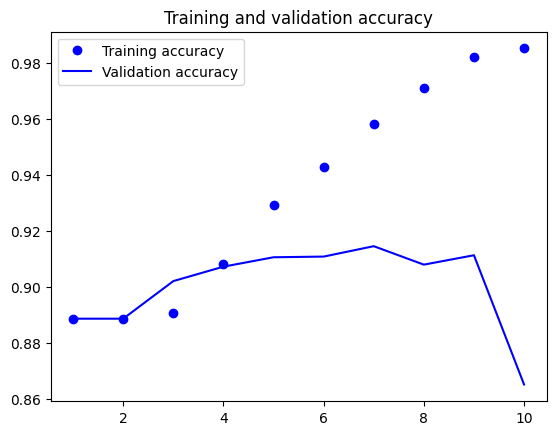

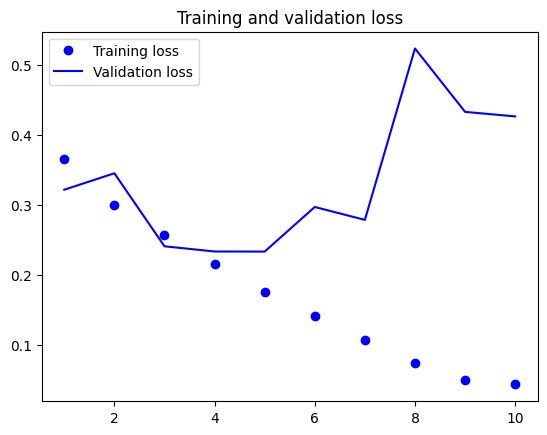

In [32]:
u.plot_loss(history)

#### Load Checkpoint

In [33]:
# Load the best checkpoint of the model
model_reloaded = keras.models.load_model("checkpoints/audio_convnet.keras")

In [34]:
print(test_data_feature)

[[[[-8.91301114e+01]
   [-9.45278847e+01]
   [-8.41057424e+01]
   ...
   [ 0.00000000e+00]
   [ 0.00000000e+00]
   [ 0.00000000e+00]]

  [[ 3.53830954e+00]
   [ 8.64724986e-01]
   [-7.85315240e+00]
   ...
   [ 0.00000000e+00]
   [ 0.00000000e+00]
   [ 0.00000000e+00]]

  [[-1.80821882e-02]
   [ 8.67872509e+00]
   [-1.81077556e-01]
   ...
   [ 0.00000000e+00]
   [ 0.00000000e+00]
   [ 0.00000000e+00]]

  ...

  [[ 8.88794485e+00]
   [ 1.56976555e+01]
   [ 1.28400846e+01]
   ...
   [ 0.00000000e+00]
   [ 0.00000000e+00]
   [ 0.00000000e+00]]

  [[-8.12385839e+00]
   [-7.12683980e-02]
   [-7.56082902e+00]
   ...
   [ 0.00000000e+00]
   [ 0.00000000e+00]
   [ 0.00000000e+00]]

  [[-1.32686683e+01]
   [-1.60563977e-01]
   [ 3.02079691e+00]
   ...
   [ 0.00000000e+00]
   [ 0.00000000e+00]
   [ 0.00000000e+00]]]


 [[[-7.15102172e+01]
   [-7.82640488e+01]
   [-7.64757967e+01]
   ...
   [ 0.00000000e+00]
   [ 0.00000000e+00]
   [ 0.00000000e+00]]

  [[ 1.74884551e+01]
   [ 9.47482033e+00]
   [

In [35]:
# Get a single batch item from the test dataset and check the accuracy
sample_test = test_data_feature[0:1]  
try:
    result = model_reloaded.predict(sample_test)
    print("Single sample prediction:", result)
except Exception as e:
    print("Error during single sample prediction:", e)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1/1 [==============================] - 0s 116ms/step
Single sample prediction: [[0.9437152]]


2024-05-02 18:28:35.685951: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [36]:
model_reloaded.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 13, 798, 32)       320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 6, 798, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 6, 798, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 3, 798, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 798, 64)        16448     
                                                                 
 flatten (Flatten)           (None, 153216)            0

### Evaluation

In [37]:
from sklearn.metrics import roc_curve
from keras.models import load_model

# Load the saved model
model = load_model('/Users/mona/Documents/GitHub/group_5_DL4M1/checkpoints/audio_convnet.keras')

In [38]:
# Load the h5 file
# Refer to https://docs.h5py.org/en/stable/high/file.html
import h5py
def load_features_h5(file_path):
    with h5py.File(file_path, 'r') as hf:
        for key in hf.keys():
            try:
                features = hf[key][:]
                return features
            except Exception as e:
                print(f"Error loading dataset '{key}': {e}")
    return None


file_path = '/Users/mona/Documents/GitHub/group_5_DL4M1/data/LFCC_features.h5'  
features = load_features_h5(file_path)

In [39]:
if features is not None:
    print(features.shape)

(41728, 13, 798)


In [40]:
# If run through, comment this cell - just for kernal restart
import numpy as np
test_data_feature = features[..., np.newaxis]

In [41]:
# If run through, comment this cell - just for kernal restart
test_data_feautre_1 = np.array(test_data_feature, dtype=float)

In [42]:
print(test_data_feautre_1.shape)

(41728, 13, 798, 1)


In [43]:
# Load 40 sample from the dev_set with true labels
import utils as u
#wav_directory = '/Volumes/T7/group5_DL4M/dev_set/wav_files'
wav_directory = '/Users/mona/Documents/GitHub/group_5_DL4M1/predictions audio file'
label_file = '/Users/mona/Documents/GitHub/group_5_DL4M1/True Lables Test.txt'
_, y_labels = u.load_data(wav_directory, label_file)

In [44]:
print(y_labels)

['bonafide', 'bonafide', 'deepfake', 'deepfake', 'deepfake', 'deepfake', 'deepfake', 'bonafide', 'bonafide', 'bonafide', 'deepfake', 'deepfake', 'deepfake', 'deepfake', 'deepfake', 'bonafide', 'bonafide', 'deepfake', 'deepfake', 'deepfake', 'bonafide', 'bonafide', 'deepfake', 'deepfake', 'deepfake', 'bonafide', 'bonafide', 'bonafide', 'bonafide', 'deepfake', 'bonafide', 'deepfake', 'bonafide', 'bonafide', 'deepfake', 'bonafide', 'bonafide', 'bonafide', 'bonafide', 'deepfake']


In [45]:
import os
import utils as u
predict_directory = '/Users/mona/Documents/GitHub/group_5_DL4M1/predictions audio file'

# Refer to ChatGPT
audio_files = [os.path.join(predict_directory, f) for f in os.listdir(predict_directory) if f.endswith('.wav') and os.path.isfile(os.path.join(predict_directory, f))]

# Alternative if not using parallel processing
predict_all_features = []
for file_path in audio_files:
    feature = process_file(file_path)
    if feature is not None:
        predict_all_features.append(feature)

# Optionally filter out None values and check shapes
valid_features = []
shapes = set()
for feature in predict_all_features:
    valid_features.append(feature)
    shapes.add(feature.shape)

print("feature shapes:", shapes)

feature shapes: {(13, 222), (13, 121), (13, 191), (13, 198), (13, 194), (13, 133), (13, 139), (13, 258), (13, 197), (13, 145), (13, 151), (13, 218), (13, 102), (13, 108), (13, 175), (13, 178), (13, 123), (13, 181), (13, 129), (13, 74), (13, 83), (13, 153), (13, 86), (13, 211), (13, 165), (13, 168), (13, 107), (13, 116), (13, 241), (13, 180), (13, 244), (13, 183), (13, 122), (13, 186), (13, 131), (13, 137), (13, 204)}


In [46]:
# Pad a list of feature arrays to a target length

def pad_features(features, target_length):
    """ 
    Pad the features along the time axis to a target length.
    
    features (list of np.array): List of feature arrays with shape (13, variable_length).
    target_length (int): The target length to pad the time dimension to.

    Returns:
    np.array: Array of padded features with shape (n_samples, 13, target_length).
    
    """
    padded_features = np.zeros((len(features), features[0].shape[0], target_length))
    
    for i, feature in enumerate(features):
        sequence_length = feature.shape[1]

        if sequence_length > target_length:
            padded_features[i, :, :] = feature[:, :target_length]

        else:
            padded_features[i, :, :sequence_length] = feature
    
    return padded_features

target_length = 798

predict_uniform_features_array = pad_features(predict_all_features, target_length)
# Add one more dimension to match the shape
predict_uniform_features_array = predict_uniform_features_array[..., np.newaxis]

In [47]:
print(predict_uniform_features_array.shape)

(40, 13, 798, 1)


In [48]:
predictions = model.predict(predict_uniform_features_array)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1/2 [==============>...............] - ETA: 0s

2024-05-02 18:28:40.076473: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 143ms/step


In [49]:
# Check if the length of labels and predictions audio are same
print(f'Length of y_labels: {len(y_labels)}')
print(f'Length of predictions: {len(predictions)}')

# If lengths differ, find out if any specific entries are missing
if len(y_labels) != len(predictions):
    print("Mismatch in array lengths detected. Investigating further...")

Length of y_labels: 40
Length of predictions: 40


In [50]:
y_numeric = np.array([1 if label == 'bonafide' else 0 for label in y_labels])

# Then use these numeric labels to calculate EER
eer, threshold = u.calculate_eer(y_numeric, predictions)
print(f"EER: {eer:.2%}, Threshold: {threshold}")

EER: 90.00%, Threshold: 0.8110072910785675


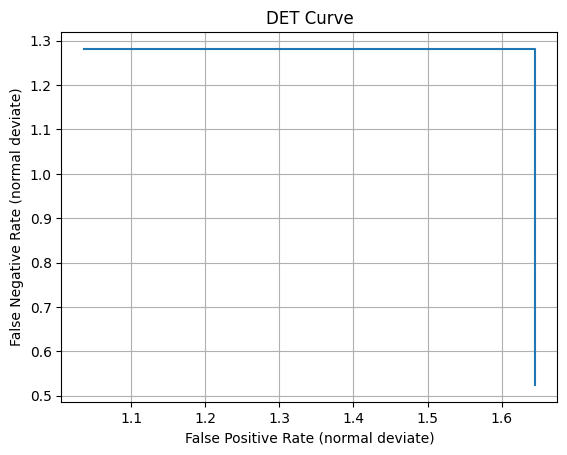

In [51]:
u.plot_det_curve(y_numeric, predictions)